In [20]:
import pickle
import matplotlib.pyplot as plt
import math
import numpy as np
%matplotlib inline

In [153]:
        filename = '{}/results/{}/population_size_{}_update_days_{}_{}_static_sim_regrets_actions_l_clipped_smallers_base_coef_scale.pkl'.format('../../Downloads/pooling_results/batch/','case_one',32,7,'short')
        with open(filename,'rb') as f:
            d =pickle.load(f)

In [146]:
def get_to_plot_actions(actions):
    
    skeys = sorted(actions.keys())
    to_plot = []
    for k in skeys:
        to_plot.append(sum(actions[k])/len(actions[k]))
    return to_plot

In [147]:
def get_to_plot_regrets(actions):
    
    skeys = sorted(actions.keys())
    to_plot = []
    for k in skeys:
        to_plot.append(np.array(actions[k]).mean())
    return to_plot

In [154]:
x =get_to_plot_actions(d['actions'])
#to_plot = [x[i] for i in range(0,len(x),5)]

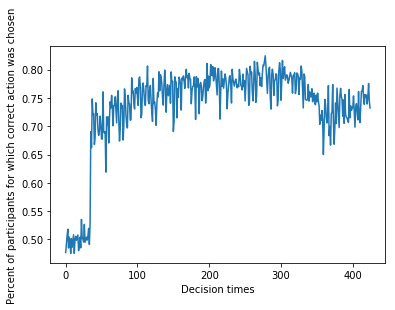

In [155]:

plt.plot(x)
plt.ylabel('Percent of participants for which correct action was chosen')
plt.xlabel('Decision times')
plt.savefig('weekly_updates_percent_correct_action.png')

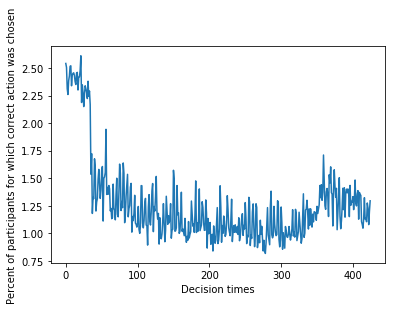

In [156]:
to_plotr =  get_to_plot_regrets(d['regrets'])
#to_plotr = [to_plotr[i] for i in range(0,len(to_plotr),5)]
plt.plot(to_plotr)
plt.ylabel('Percent of participants for which correct action was chosen')
plt.xlabel('Decision times')
plt.savefig('weekly_updates_regret.png')
#plt.savefig('daily_updates_regret.png')

In [13]:
with open('{}merged_est.pkl'.format('../../Downloads/distributions/'),'rb') as f:
    merged  = pickle.load(f)

In [15]:
def adjust_to_thirty_minute(steps):
    return steps.fillna(0).tz_localize(None).resample('30T').sum().fillna(0)

In [22]:
all_steps = []
for k,v in merged.items():
    if k!=4:
        s = adjust_to_thirty_minute(v['steps'])
        all_steps.extend([math.log(i+.5) for i in s])

In [23]:
np.array(all_steps).std()

2.8443192693782087

In [24]:
6**.5

2.449489742783178

In [43]:
np.random.exponential(1)

0.5124009280078023